# 3. Trust Region
For this training course we'll be using the optimization routines in SciPy.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

We also need to define a callback function so that we can plot the optimization steps.

In [2]:
def callback(x):
    global xprev
    plt.plot([xprev[0],x[0]],[xprev[1],x[1]],'b.-')
    xprev = x

## 3.1 Trust Region Subproblem
Consider the trust-region subproblem given by

$
\begin{align}
&\min_{s \in \mathbb{R}^n} s^Tg + \frac{1}{2}s^THs \\
&\text{ s.t. } \lVert s \rVert_2 \le \Delta 
\end{align}
$

and recall that any global minimizer $s$ satisfies

$
\begin{align}
(H + \lambda I)s = -g \\
(H + \lambda I) \succeq 0 \\
\lambda \left(\lVert s \rVert_2 - \Delta \right)=0
\end{align}
$

from the relevant optimality conditions. 

### 3.1.1 Solving the Subproblem

#### Coding Task:

Define the secular function as

$
\begin{align}
\phi(\lambda) = \lVert s(\lambda) \rVert_2 = \lVert -(H + \lambda I)^{-1}g  \rVert_2
\end{align}
$

and plot the following on the same plot: 

1. $\phi(\lambda)$ against $\lambda$

2. the trust region radius $\Delta$

3. $-\lambda_1$ (minus the smallest eigenvalue) of $H$

4. $\lambda = 0$

Use your plot to estimate:

1. the optimal $\lambda^*$ and thus the optimal solution $s^*$ to the trust-region subproblem 

2. if the optimal solution $s^*$ is constrained or unconstrained

for the following input data:

$
\begin{align}
H = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2
\end{pmatrix},\qquad\quad
g = 
\begin{pmatrix}
1 \\
0 \\
1
\end{pmatrix},\quad
\text{ and } \Delta = 2 
\end{align}
$

$
\begin{align}
H = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2
\end{pmatrix},\qquad\quad
g = 
\begin{pmatrix}
1 \\
0 \\
1
\end{pmatrix},\quad
\text{ and } \Delta = 5/12 
\end{align}
$

$
\begin{align}
H = 
\begin{pmatrix}
-2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1
\end{pmatrix},\quad
g = 
\begin{pmatrix}
1 \\
0 \\
1
\end{pmatrix},\quad
\text{ and } \Delta = 5/12 
\end{align}
$

$
\begin{align}
H = 
\begin{pmatrix}
-2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1
\end{pmatrix},\quad
g = 
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix},\quad
\text{ and } \Delta = 1/2 
\end{align}
$

$
\begin{align}
H = 
\begin{pmatrix}
-2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1
\end{pmatrix},\quad
g = 
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix},\quad
\text{ and } \Delta = \sqrt{2} 
\end{align}
$


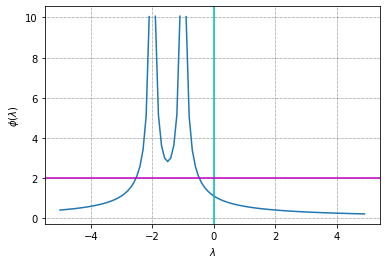

In [3]:
# Parameters
g = np.array([1,0,1]) 
#g = np.array([0,0,1]) 
H = np.array([[1,0,0],[0,2,0],[0,0,2]])
#H = np.array([[-2,0,0],[0,-1,0],[0,0,-1]])
I = np.eye(3)
Delta = 2

# Secular function
psi = lambda l: np.linalg.norm(np.linalg.solve(H+l*I,-g))

# Evaluate secular function
X = np.arange(-5,5,0.1)
Y = np.array([psi(l) for l in X])

# Mask poles
X[Y>100] = np.inf
Y[Y>100] = np.inf

# Plot secular function
plt.figure()
plt.plot(X,Y)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\phi(\lambda)$')
plt.grid()

# Plot minus leftmost eigenvalue
plt.axvline(0,color='c')

# Plot trust region radius
plt.axhline(Delta,color='m')

plt.show()

### 3.1.2 Subproblem Evolution
Solve the trust-region subproblem with 

$
\begin{align}
H = 
\begin{pmatrix}
1 & 0 \\
0 & 3
\end{pmatrix},\quad
g = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
\end{align}
$

as the trust-region radius $\Delta$ increases and plot the solution trajectory. Hint: carefully use the fact that

$
\begin{align}
s(\lambda) = -(H + \lambda I)^{-1}
\end{align}
$

For what value of the trust-region radius does the solution become unconstrained?

What about when we change the problem to the following?

$
\begin{align}
H = 
\begin{pmatrix}
-3 & 0 \\
0 & -1
\end{pmatrix},\quad
g = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
\end{align}
$


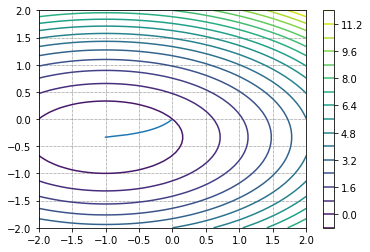

In [4]:
# Parameters
g = np.array([1,1]) 
H = np.array([[1,0],[0,3]])
I = np.eye(2)
Delta = 1

# Constrained solution
s = lambda l: np.linalg.solve(H+l*I,-g)

# Evaluate solution trajectory until unconstrained solution
X = np.linspace(0,50,100)
Y = np.array([s(l) for l in X])

# Plot solution trajectory
plt.figure()
plt.plot(Y[:,0],Y[:,1])
plt.grid()

# Evaluate trust-region function
fun = lambda s: s[0]*g[0] + s[1]*g[1] + 0.5*s[0]*H[0,0]*s[0] + 0.5*s[1]*H[1,1]*s[1]
X = np.linspace(-2,2)
Y = np.linspace(-2,2)
Z = fun(np.meshgrid(X,Y))

# Plot trust-region function
plt.contour(X,Y,Z,20)
plt.colorbar()
plt.show()

## 3.2 Trust Region Methods
Consider the Rosenbrock function defined as

$
f(x) = (a - x_1)^2 + b(x_2 - x_1^2)^2
$

where usually $a=1$ and $b=100$.

### 3.2.1 Trust Region Exact

A trust-region algorithm that solves the trust-region subproblem exactly, using Newton's method on the secular equation (as discussed in lectures):

$
\begin{align}
&\text{Factorize } H + \lambda I = LL^T \\
&\text{Solve } Lu = -g \\
&\text{Solve } L^Ts = u \\
&\text{Solve } Lw = s \\
&\text{Set } \lambda = \lambda + \left( \frac{\lVert s \rVert_2 - \Delta}{\Delta} \right)\left( \frac{\lVert s \rVert^2_2}{\lVert w \rVert^2_2} \right)
\end{align}
$

with suitable safeguards and special handling of the hard case.

#### Coding Task: 
Now apply Scipy's trust-exact starting from $x^0 = (-a,a)$ to solve the above problem for $a=1$ and $b=100$.

     fun: 5.4669467408061773e-05
    hess: array([[ 813.7116442 , -402.90327443],
       [-402.90327443,  200.        ]])
     jac: array([ 0.07132719, -0.02820072])
 message: 'Optimization terminated successfully.'
    nfev: 14
    nhev: 14
     nit: 13
    njev: 12
  status: 0
 success: True
       x: array([1.00725819, 1.01442805])


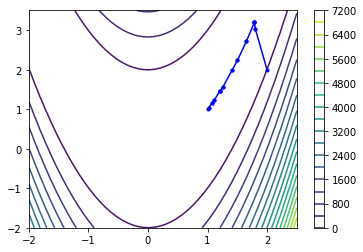

In [5]:
# Parameters
a = 1
b = 100

# Initial guess
x0 = np.array([2,2])

# Objective function, gradient and Hessian
fun = lambda x: (a-x[0])**2 + b*(x[1]-x[0]**2)**2
jac = lambda x: np.array([-2*(a-x[0])-2*x[0]*2*b*(x[1]-x[0]**2),2*b*(x[1]-x[0]**2)])
hess = lambda x: np.array([[2-4*b*x[1]+12*b*x[0]**2,-4*b*x[0]],[-4*b*x[0],2*b]])

# Plot function contours
plt.figure()
X = np.linspace(-2,2.5)
Y = np.linspace(-2,3.5)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),20)
plt.colorbar()

# Call Scipy's CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='trust-exact', jac=jac, hess=hess, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

### 3.2.2 Trust Region CG

A trust region algorithm that solves the trust-region subproblem approximately using CG (as discussed in lectures). Essentially this applies CG to solve

$
\begin{align}
(H + \lambda I)s = -g
\end{align}
$

truncating to the trust region radius $\Delta$ before encountering negative curvature or exceeding $\Delta$.

#### Coding Task: 
Now apply Scipy's trust-ncg starting from $x^0 = (-a,a)$ to solve the above problem for $a=1$ and $b=100$.

     fun: 0.0004252132652748247
    hess: array([[ 835.3084499 , -408.24645045],
       [-408.24645045,  200.        ]])
     jac: array([0.02350248, 0.00868582])
 message: 'Optimization terminated successfully.'
    nfev: 22
    nhev: 17
     nit: 21
    njev: 18
  status: 0
 success: True
       x: array([1.02061613, 1.04170071])


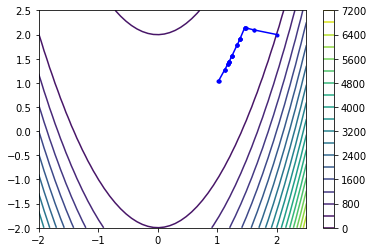

In [6]:
# Parameters
a = 1
b = 100

# Initial guess
x0 = np.array([2,2])

# Objective function, gradient and Hessian
fun = lambda x: (a-x[0])**2 + b*(x[1]-x[0]**2)**2
jac = lambda x: np.array([-2*(a-x[0])-2*x[0]*2*b*(x[1]-x[0]**2),2*b*(x[1]-x[0]**2)])
hess = lambda x: np.array([[2-4*b*x[1]+12*b*x[0]**2,-4*b*x[0]],[-4*b*x[0],2*b]])

# Plot function contours
plt.figure()
X = np.linspace(-2,2.5)
Y = np.linspace(-2,2.5)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),20)
plt.colorbar()

# Call Scipy's CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='trust-ncg', jac=jac, hess=hess, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

### 3.2.3 Trust Region Krylov

A trust region algorithm that solves the trust-region subproblem approximately using Lanczos (as discussed in lectures).

#### Coding Task: 
Now apply Scipy's trust-krylov starting from $x^0 = (-a,a)$ to solve the above problem for $a=1$ and $b=100$.

     fun: 0.002305467938203958
    hess: array([[ 880.57544587, -419.19753274],
       [-419.19753274,  200.        ]])
     jac: array([0.03582087, 0.0287057 ])
 message: 'Optimization terminated successfully.'
    nfev: 13
    nhev: 11
     nit: 12
    njev: 13
  status: 0
 success: True
       x: array([1.04799383, 1.0984346 ])


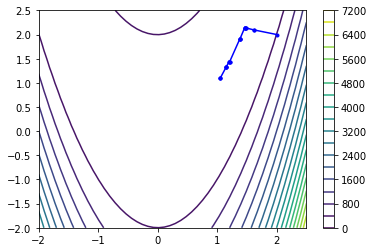

In [7]:
# Parameters
a = 1
b = 100

# Initial guess
x0 = np.array([2,2])

# Objective function, gradient and Hessian
fun = lambda x: (a-x[0])**2 + b*(x[1]-x[0]**2)**2
jac = lambda x: np.array([-2*(a-x[0])-2*x[0]*2*b*(x[1]-x[0]**2),2*b*(x[1]-x[0]**2)])
hess = lambda x: np.array([[2-4*b*x[1]+12*b*x[0]**2,-4*b*x[0]],[-4*b*x[0],2*b]])

# Plot function contours
plt.figure()
X = np.linspace(-2,2.5)
Y = np.linspace(-2,2.5)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),20)
plt.colorbar()

# Call Scipy's CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='trust-krylov', jac=jac, hess=hess, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

#### Exercises: 

1. Compare the number of objective function, gradient and Hessian evaluations across the different trust-region methods above (these are reported as nfev, njev and nhev in the outputs above). How do these compare to linesearch?